In [23]:
import pandas as pd
from utils import *
import numpy as np 
import csv
from itertools import islice
import matplotlib.pyplot as plt
import os
import subprocess
from joblib import Parallel, delayed


In [24]:
sim_id = '15240913530142780687'
print('Project root directory:', PROJ_DIR)
path = os.path.join(PROJ_DIR, BIODATA_DIR, 'drosophila_kr')
filepath_tau0_occ = os.path.relpath('results_example/drosoph_kr_occupancy_'+ sim_id + '.wig', start=os.curdir)
filepath_tau0_aff = os.path.relpath('results_example/drosoph_kr_affinity_landscape_' + sim_id + '.wig', start=os.curdir)
filepath_site_first_reached = os.path.relpath('results_example/drosoph_kr_target_site_' + sim_id + '.csv', start=os.curdir)
#filepath_tau0_occ_lin = os.path.relpath('results_example/drosoph_kr_occupancy_'+ sim_id + '.wig', start=os.curdir)



Project root directory: /home/al_dente/Downloads/GRiPE


In [10]:

def find_file_segment(path, required):
    with open(path, "r") as file:
        for num_line, line in enumerate(file):
                if required in line:
                    print(line)
                    return(num_line)



In [11]:
required_first = "Cell simulation time:"
required_second = "Elapsed time:"
Start = find_file_segment(filepath,required_first) + 3
End = find_file_segment(filepath,required_second) - 2
print(Start)
print(End)

FileNotFoundError: [Errno 2] No such file or directory: 'results_example\\drosophila_kr\\drosoph_kr_status_16503428093686928554.txt'

In [12]:
def parse_string(Parametr):
    file = open(filepath, "r")
    list = []
    for i in islice(file, Start, End):
        if "Full update of TF binding propensities" in i:
            continue
        if "bound" in i:
            if Parametr==7 :
                list.append(i.split()[Parametr-1])
                continue
            elif "unbound" in i:
                if Parametr==10:  
                    list.append(i.split()[12])
                    continue
                if Parametr==12:
                    list.append("-")
                    continue
            if Parametr==10:
                list.append(i.split()[Parametr-1])
                continue
        if "hop" in i:
            if "hopped at the same position" in i:
                if Parametr==7:
                    list.append("hop")
                    continue
                if Parametr==10:
                    list.append(i.split()[Parametr+1])
                    continue
                if Parametr==12:
                    list.append("Same pos")
                    continue
            if Parametr==7:
                list.append("hop " + i.split()[Parametr])
                continue
        if "is switching between search and recognition state" in i:
            if Parametr==7:
                list.append("Switch")
                continue
            if Parametr==10:
                list.append(i.split()[8])
                continue
            if Parametr==12:
                list.append(i.split()[25])
                continue
        

                            
            
        list.append(i.split()[Parametr])
    return list

In [7]:
data = {'Time': parse_string(0), 'Number': parse_string(2), 'Type': parse_string(5), 'Action': parse_string(7), 'Position': parse_string(10), 'Details': parse_string(12)}
df = pd.DataFrame(data)
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'results_example\\drosophila_kr\\drosoph_kr_status_16503428093686928554.txt'

In [8]:
df.to_pickle (" df.pkl ")

NameError: name 'df' is not defined

In [58]:
df.sample(100)

NameError: name 'df' is not defined

In [26]:
with open(filepath_sites, "r") as f:
    lines = f.readlines()
with open(filepath_sites, "w") as f:
    for line in lines:
        if "kr" in line:
            f.write(line)

data = pd.read_csv(filepath_occup,  sep=',', usecols = [])
print(data)

In [7]:
kr_size = 11

In [73]:
data_occ_tau0 = pd.read_csv(filepath_tau0_occ, sep=',',skiprows = 1, usecols = [2])[:-kr_size+1]
data_aff_tau0 = pd.read_csv(filepath_tau0_aff, sep=',',skiprows = 1, usecols = [1])[:-kr_size+1]
aff_tau0 = 1 - data_aff_tau0 / data_aff_tau0.max()

In [71]:
data_occ = pd.read_csv(filepath_occ, sep=',',skiprows = 1, usecols = [2])[:-kr_size+1]
data_aff = pd.read_csv(filepath_aff, sep=',',skiprows = 1, usecols = [1])[:-kr_size+1]
aff = 1 - data_aff/ data_aff.max()

FileNotFoundError: [Errno 2] No such file or directory: '\\GRiPE\\results_example\\drosoph_kr_occupancy_14718064205581214960.wig'

In [29]:
data_coll_count =  pd.read_csv(filepath_occ, sep=',',skiprows = 1, usecols = [1])[:-kr_size+1]
plt.plot(data_coll_count,data_occ, '.', ms =1, lw=0)
plt.yscale('log')

FileNotFoundError: [Errno 2] No such file or directory: '/home/al_dente/IdeaProjects/GRiPE\\results_example\\drosoph_kr_occupancy_17934973361301340786.wig'

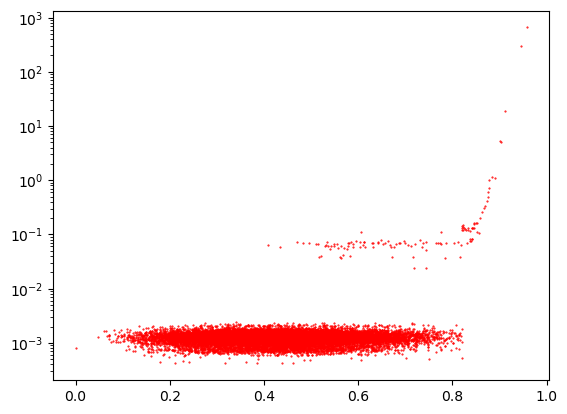

In [75]:
plt.plot(aff_tau0, data_occ_tau0, '.', ms=1, lw=0, color = 'red', label = 'tau0')
#plt.plot(aff, data_occ, '.', ms=1, lw=0, color = 'blue', label = 'tau')
plt.yscale('log')

NameError: name 'aff' is not defined

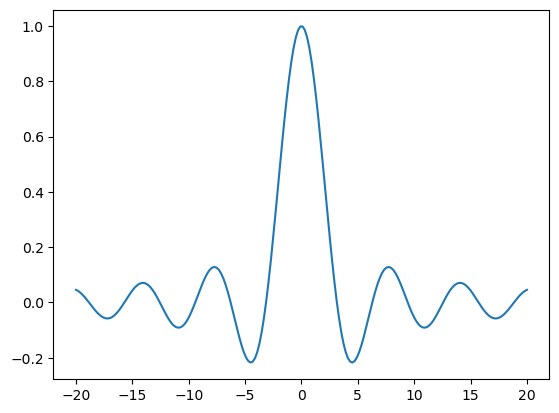

In [3]:
    xmin = -20.0
    xmax = 20.0
    count = 200
x = np.linspace(xmin, xmax, count)
y1 = np.sinc(x / np.pi)
plt.plot(x, y1, label="f(x)")
plt.plot(aff, data_occ, '.', ms=1, lw=0, color = 'blue', label = 'tau')
plt.plot(aff_tau0, data_occ_tau0, '.', ms=1, lw=0, color = 'green', label = 'tau0')


In [13]:
df_tf_data0 = pd.read_csv("params_example/tfs.csv", sep = ';')
delay = np.array(df_tf_data0[TAU] > 0, dtype=int)
df_tf_data0

,name,DBD,ES,COPYNUMBER,SIZELEFT,SIZERIGHT,ASSOCRATE,INITIALDROP,UNBINDINGPROBABILITY,SLIDELEFTPROBABILITY,...,PREBOUNDTOHIGHESTAFFINITY,TFISIMMOBILE,ISBIASEDRANDOMWALK,ISTWOSTATERANDOMWALK,REPRESSIONRATE,DEREPRESSIONATTENUATIONFACTOR,REPRLENLEFT,REPRLENRIGHT,SPECIFICENERGYTHRESHOLD,TAU
0,kr,"PWM: A = [-0.4207, 0.8163, 1.0251, -2.9818, -1...",2.973637,8956,0,0,0.000195,NaN,0.000048,0.499976,...,False,False,False,True,0,10,100,100,18.587326,0.00001


In [14]:
# pack these lists of parameters into the master list
tau = [10**-5, 0]
master_list = [tau]
cumprod_lengths = np.cumprod([len(a) for a in master_list])
total_par_num = cumprod_lengths[-1]
print(total_par_num)

2


In [17]:
dict_params0 = read_params_to_dict(os.path.join(path, 'basic_params.grp'))


NameError: name 'path' is not defined

In [4]:
#data_site_first_reached = pd.read_csv(filepath_tau0_occ, sep=',',skiprows = 1, usecols = [2])[:-kr_size+1]
sim_num = 2

In [16]:
def simulate_single_par_set(par_i):
    # get params from the master list
    var_par_list = []
    for j in range(len(master_list)):
        length = len(master_list[j])
        var_par_list.append(master_list[j][(par_i // (cumprod_lengths[j]//length)) % length])
    tau = var_par_list
    # set params
    df_tf_data = df_tf_data0.copy()
    df_tf_data[DELAY] = tau
    tf_name = os.path.join(path, 'tfs' + str(par_i) + '.csv')
    par_name = os.path.join(path, 'params' + str(par_i) + '.grp')
    dict_params0['TF_FILE'] = '"' + tf_name + '"'
    # save parameter files
    df_tf_data.to_csv(path_or_buf=tf_name, sep=';', index=False)
    write_dict_to_params(par_name, dict_params0)
    # run simulations
    args = [par_name, '1', '1000000']
    id_list = []
    dir_list = []
    pref_list = []
    for sim_i in range(sim_num):
        proc = subprocess.run(['java', '-classpath', JAVA_CLASS_PATH, JAVA_CLASS, *args], 
                                cwd=PROJ_DIR, capture_output=True)
        output = proc.stdout.decode()
        outerr = proc.stderr.decode()
        if not (outerr == ''):
            print('Stderr from parameter set #{:d}, simulation #{:d}:'.format(par_i, sim_i))
            print(outerr + '\n')
        # save simulation id 
        id_list.append(int(output[output.find('id'):].split(' ')[1].split('\n')[0]))
        if sim_i == 1:
            pref_list.append(output[output.find('prefix'):].split(' ')[1].split('\n')[0])
            dir_list.append(output[output.find('directory'):].split(' ')[1].split('\n')[0])
    if par_i % 10 == 0:
        print('Progress: parameter set #{:d}'.format(par_i))
    #params_and_ids_list.append([var_par_list, id])
    return (*var_par_list, id_list, dict_params0[OUTPUT_FILENAME].replace('"', ''), 
            dict_params0[OUTPUT_FOLDER].replace('"', ''))

In [6]:
params_and_ids_list = Parallel(n_jobs=9)(
    delayed(simulate_single_par_set)(par_i) for par_i in range(total_par_num))
    

NameError: name 'DELAY' is not defined

In [ ]:
df_res = pd.DataFrame(params_and_ids_list, columns=['alpha', 'r', 'k', 'rad', 'ids', 'prefix', 'dir'])
df_res

In [ ]:
#df_res.to_string(os.path.join(PROJ_DIR, DATAPROC_DIR, 'experiment_id_lists', 'kr_alpha_r_k_rad_ens30_test.fwf'), index=False)
df_res.to_csv(os.path.join(PROJ_DIR, DATAPROC_DIR, 'experiment_id_lists', 'kr_alpha_r_k_rad_ens30_test.csv'), sep=';', index=False)